In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
import time
import logging
import argparse
import itertools
import matplotlib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import numpy as np

sys.path.insert(0, '../network')
from measures import DataStore

In [7]:
directory = "4-state-transitions/data/"
keys=['I_ext_1', 'I_ext_2']
ds1 = DataStore(directory)
ds1.load()
ds1.process(keys)

  0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
def slice_data(ds, output, keys, raise_on_error=False):
    for idxs, vals in zip(
        itertools.product(*[range(len(ds.keyvals[key])) for key in keys]),
        itertools.product(*[ds.keyvals[key] for key in keys])):
        try:
            output[idxs] = ds.data[vals]
        except:
            if raise_on_error:
                raise StandardError

In [9]:
output = np.zeros((1,2), dtype=object)
slice_data(ds1, output, keys)

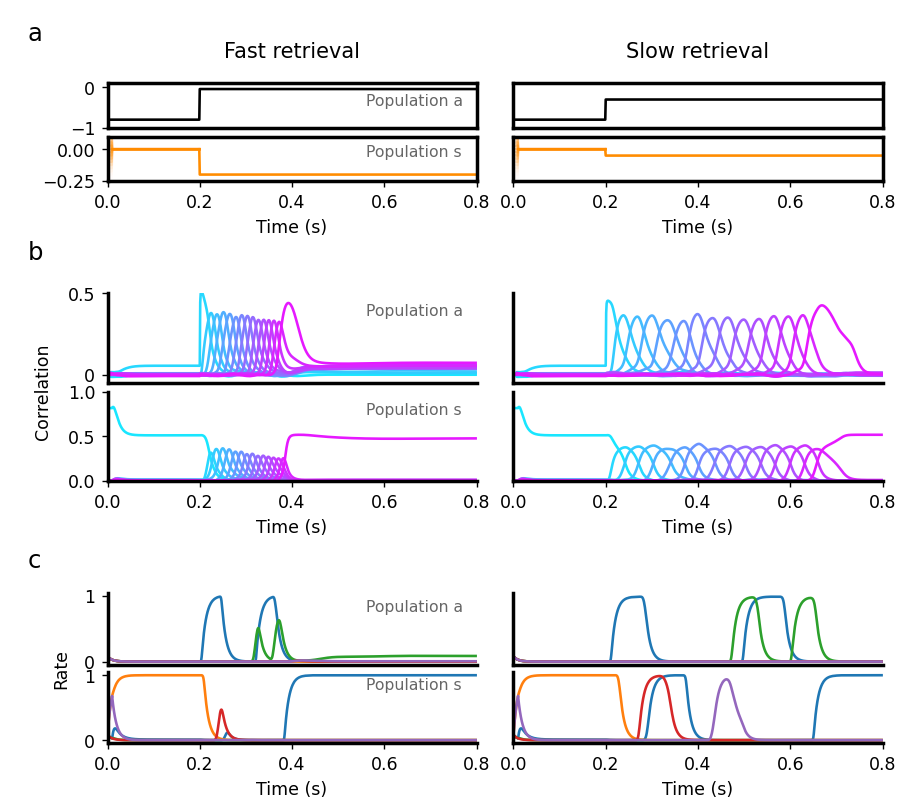

In [12]:
matplotlib.rcParams['axes.linewidth'] = 2

fig = plt.figure(figsize=(8,6), dpi=125, constrained_layout=False)
gs1 = fig.add_gridspec(2,2, bottom=0.75, wspace=0.1)
gs2 = fig.add_gridspec(2,2, top=0.60, bottom=0.35, wspace=0.1, hspace=0.10)
gs3 = fig.add_gridspec(2,2, top=0.2, bottom=0, wspace=0.1, hspace=0.10)

ax1a = fig.add_subplot(gs1[0,0])
ax1b = fig.add_subplot(gs1[1,0])
ax2a = fig.add_subplot(gs1[0,1])
ax2b = fig.add_subplot(gs1[1,1])

ax3 = fig.add_subplot(gs2[0,0])
ax4 = fig.add_subplot(gs2[0,1])
ax5 = fig.add_subplot(gs2[1,0])
ax6 = fig.add_subplot(gs2[1,1])

ax7 = fig.add_subplot(gs3[0,0])
ax8 = fig.add_subplot(gs3[0,1])
ax9 = fig.add_subplot(gs3[1,0])
ax10 = fig.add_subplot(gs3[1,1])

sim1 = list(ds1.data.values())[0]
sim2 = list(ds1.data.values())[1]

import scipy
rv = scipy.stats.norm()
patterns_repr = rv.pdf(np.linspace(-3,3,100))

import matplotlib
cmap = matplotlib.cm.get_cmap('cool')
colors = [cmap(x) for x in np.linspace(0.1,0.9,16)]

ax1a.set_title("Fast retrieval", fontsize=12, pad=15)
ax2a.set_title("Slow retrieval", fontsize=12, pad=15)

## --- Fast retrieval simulation -----------------------------

I_ext_1 = sim1['params']['I_ext_1']
I_ext_2 = sim1['params']['I_ext_2']

# External input
T = 0.8
dt = 1e-3
t = np.arange(0,T+dt,dt)
ext1 = np.zeros(t.size)
ext2 = np.zeros((100, t.size))

# Transient patterned input
T_transient = 0.01
n_transient = int(T_transient/dt)
ext2[:,:n_transient] = np.linspace(-0.25,0.25,100)[:,np.newaxis]

# Preparatory period
T_prep = 0.2
n_prep = int(T_prep/dt)
ext1[:n_prep] = -0.8

# Retrieval period
ext1[n_prep:] = I_ext_1
ext2[0,n_prep:] = I_ext_2

ax1a.plot(t, ext1, color='black')
for n in range(0,100,5):
    ax1b.plot(t[:n_prep], ext2[n,:n_prep], alpha=patterns_repr[n], color='darkorange')
ax1b.plot(t[n_prep-1:], ext2[0,n_prep-1:], color='darkorange')

ax1a.set_xticks([])
ax2a.set_xticks([])

for i, m in enumerate(sim1['q1']):
    ax3.plot(t[:-2],m[:-1], c=colors[i]);
for i, m in enumerate(sim1['q2']):
    ax5.plot(t[:-2],m[:-1], c=colors[i]);

for ax in [ax1a, ax1b]:
    ax.set_xlim([0,0.8]);
    
ax1a.set_ylim([-1.,0.1]);
ax1b.set_ylim([-0.25,0.1]);

ax3.set_xlim([0,0.8])
ax3.set_xticks([])
ax5.set_xlim([0,0.8])

## --- Slow retrieval simulation -----------------------------

I_ext_1 = sim2['params']['I_ext_1']
I_ext_2 = sim2['params']['I_ext_2']

# External input
T = 0.8
dt = 1e-3
t = np.arange(0,T+dt,dt)
ext1 = np.zeros(t.size)
ext2 = np.zeros((100, t.size))

# Transient patterned input
T_transient = 0.01
n_transient = int(T_transient/dt)
ext2[:,:n_transient] = np.linspace(-0.25,0.25,100)[:,np.newaxis]

# Preparatory period
T_prep = 0.2
n_prep = int(T_prep/dt)
ext1[:n_prep] = -0.8

# Retrieval period
ext1[n_prep:] = I_ext_1
ext2[0,n_prep:] = I_ext_2

ax2a.plot(t, ext1, color='black')
for n in range(0,100,5):
    ax2b.plot(t[:n_prep], ext2[n,:n_prep], alpha=patterns_repr[n], color='darkorange')
ax2b.plot(t[n_prep-1:], ext2[0,n_prep-1:], color='darkorange')

for i, m in enumerate(sim2['q1']):
    ax4.plot(t[:-2],m[:-1], c=colors[i]);
for i, m in enumerate(sim2['q2']):
    ax6.plot(t[:-2],m[:-1], c=colors[i]);

ax2a.set_ylim([-1,0.10]);
ax2b.set_ylim([-0.25,0.10]);
    
for ax in [ax2a, ax2b]:
    ax.set_xlim([0,0.8]);

ax4.set_xlim([0,0.8])
ax4.set_xticks([])
ax6.set_xlim([0,0.8]);

ax1b.set_xlabel("Time (s)")
ax2b.set_xlabel("Time (s)")
ax5.set_xlabel("Time (s)")
ax6.set_xlabel("Time (s)")
ax9.set_xlabel("Time (s)")
ax10.set_xlabel("Time (s)")

ax2a.set_yticks([])
ax2b.set_yticks([])

ax4.set_yticks([])
ax6.set_yticks([])

ax1a.annotate(xy=(0.7,0.8), xytext=(0.70,0.50), xycoords='axes fraction', s="Population a", alpha=0.6, fontsize=9)
ax1b.annotate(xy=(0.7,0.8), xytext=(0.70,0.55), xycoords='axes fraction', s="Population s", alpha=0.6, fontsize=9)

ax3.annotate(xy=(0.7,0.8), xytext=(0.70,0.75), xycoords='axes fraction', s="Population a", alpha=0.6, fontsize=9)
ax5.annotate(xy=(0.7,0.8), xytext=(0.70,0.75), xycoords='axes fraction', s="Population s", alpha=0.6, fontsize=9)

ax3.set_ylim([-0.05,0.5])
ax4.set_ylim([-0.05,0.5])
ax3.set_yticks([0,0.5])
ax3.set_yticklabels(["0","0.5"])

ax5.set_ylim([0,1.0])
ax6.set_ylim([0,1.0])

ax5.set_ylabel("Correlation")
ax5.yaxis.set_label_coords(-0.15,1)

for ax in [ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Single neurons
idxs1 = np.random.RandomState(seed=4).choice(40000, 5)
idxs2 = 40000+np.random.RandomState(seed=2).choice(40000, 5)

for m in sim1['r'][idxs1,:-1]:
    ax7.plot(t[:-2],m)
for m in sim1['r'][idxs2,:-1]:
    ax9.plot(t[:-2],m)
    
for m in sim2['r'][idxs1,:-1]:
    ax8.plot(t[:-2],m)
for m in sim2['r'][idxs2,:-1]:
    ax10.plot(t[:-2],m)
    
ax7.set_xlim([0,T])
ax8.set_xlim([0,T])
    
ax8.set_yticks([])
ax10.set_yticks([])

ax7.set_xticks([])
ax8.set_xticks([])

ax9.set_xlim([0,0.8])
ax10.set_xlim([0,0.8])

ax9.set_ylabel("Rate")
ax9.yaxis.set_label_coords(-0.1,1.05)

ax7.annotate(xy=(0.7,0.8), xytext=(0.70,0.75), xycoords='axes fraction', s="Population a", alpha=0.6, fontsize=9)
ax9.annotate(xy=(0.7,0.8), xytext=(0.70,0.75), xycoords='axes fraction', s="Population s", alpha=0.6, fontsize=9)

plt.annotate(s="a", xy=(0.03,0.95), xycoords='figure fraction', fontsize=14);
plt.annotate(s="b", xy=(0.03,0.68), xycoords='figure fraction', fontsize=14);
plt.annotate(s="c", xy=(0.03,0.3), xycoords='figure fraction', fontsize=14);

fig.savefig("4.pdf", dpi=150, bbox_inches='tight')